In [ ]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

print('Imports Complete')

Imports Complete


In [ ]:
train = pd.read_csv('/content/sample_data/LSTM-Multivariate_pollution.csv')
train.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
train.shape

(43800, 9)

In [ ]:
train.index = pd.to_datetime(train['date'], format='%Y.%m.%d %H:%M:%S')

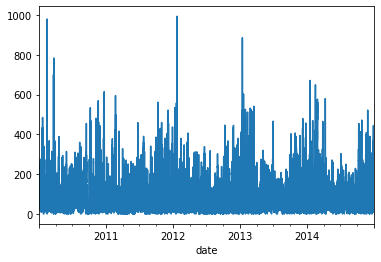

In [ ]:
poll = train['pollution']
poll.plot()

In [ ]:
train.wnd_dir.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [ ]:
def wind_encode(s):
    if s == "SE":
        return 1
    elif s == "NE":
        return 2
    elif s == "NW":
        return 3
    else:
        return 4

train["wind_dir"] = train["wnd_dir"].apply(wind_encode)
train = train.drop(["wnd_dir", 'date'], axis=1).head()
train.head()

,pollution,dew,temp,press,wnd_spd,snow,rain,wind_dir
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,1
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,1
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,1
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,1
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,1


In [ ]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE=5
X, y = df_to_X_y(poll, WINDOW_SIZE)
X.shape, y.shape

((43795, 5, 1), (43795,))

In [ ]:
X_train, y_train = X[:35000], y[:35000]
X_val, y_val = X[35000:], y[35000:65000]

In [ ]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, verbose=1, callbacks=[cp])

Epoch 1/10
1093/1094 [============================>.] - ETA: 0s - loss: 15777.6318 - root_mean_squared_error: 125.6090

1094/1094 [==============================] - 14s 11ms/step - loss: 15773.9961 - root_mean_squared_error: 125.5946 - val_loss: 14519.1455 - val_root_mean_squared_error: 120.4954
Epoch 2/10
1089/1094 [============================>.] - ETA: 0s - loss: 12195.6816 - root_mean_squared_error: 110.4341

1094/1094 [==============================] - 14s 13ms/step - loss: 12182.4062 - root_mean_squared_error: 110.3739 - val_loss: 11272.3594 - val_root_mean_squared_error: 106.1714
Epoch 3/10
1089/1094 [============================>.] - ETA: 0s - loss: 9276.4863 - root_mean_squared_error: 96.3145

1094/1094 [==============================] - 11s 10ms/step - loss: 9267.3789 - root_mean_squared_error: 96.2672 - val_loss: 8535.5869 - val_root_mean_squared_error: 92.3882
Epoch 4/10
1093/1094 [============================>.] - ETA: 0s - loss: 6888.1157 - root_mean_squared_error: 82.9947

1094/1094 [==============================] - 12s 11ms/step - loss: 6888.2441 - root_mean_squared_error: 82.9954 - val_loss: 6364.0039 - val_root_mean_squared_error: 79.7747
Epoch 5/10
1091/1094 [============================>.] - ETA: 0s - loss: 5062.1343 - root_mean_squared_error: 71.1487

1094/1094 [==============================] - 11s 10ms/step - loss: 5061.3042 - root_mean_squared_error: 71.1428 - val_loss: 4720.9775 - val_root_mean_squared_error: 68.7094
Epoch 6/10
1085/1094 [============================>.] - ETA: 0s - loss: 3727.3301 - root_mean_squared_error: 61.0519

1094/1094 [==============================] - 11s 10ms/step - loss: 3720.9238 - root_mean_squared_error: 60.9994 - val_loss: 3514.5422 - val_root_mean_squared_error: 59.2836
Epoch 7/10
1088/1094 [============================>.] - ETA: 0s - loss: 2770.5764 - root_mean_squared_error: 52.6363

1094/1094 [==============================] - 11s 10ms/step - loss: 2764.9236 - root_mean_squared_error: 52.5825 - val_loss: 2628.7026 - val_root_mean_squared_error: 51.2709
Epoch 8/10
1094/1094 [==============================] - ETA: 0s - loss: 2106.4412 - root_mean_squared_error: 45.8960

1094/1094 [==============================] - 11s 10ms/step - loss: 2106.4412 - root_mean_squared_error: 45.8960 - val_loss: 1990.1299 - val_root_mean_squared_error: 44.6109
Epoch 9/10
1094/1094 [==============================] - ETA: 0s - loss: 1659.7307 - root_mean_squared_error: 40.7398

1094/1094 [==============================] - 10s 10ms/step - loss: 1659.7307 - root_mean_squared_error: 40.7398 - val_loss: 1535.0199 - val_root_mean_squared_error: 39.1793
Epoch 10/10
1089/1094 [============================>.] - ETA: 0s - loss: 1358.7391 - root_mean_squared_error: 36.8611

1094/1094 [==============================] - 11s 10ms/step - loss: 1362.4138 - root_mean_squared_error: 36.9109 - val_loss: 1226.0251 - val_root_mean_squared_error: 35.0146


In [ ]:
model1 = load_model('model1/')
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions,
                                  'Actual':y_train})
train_results.head()

1094/1094 [==============================] - 3s 3ms/step


,Train Predictions,Actual
0,122.328682,109.0
1,101.919907,105.0
2,107.052948,124.0
3,129.624710,120.0
4,119.975754,132.0


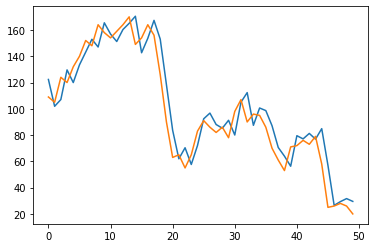

In [ ]:
plt.plot(train_results['Train Predictions'][:50])
plt.plot(train_results['Actual'][:50])

In [ ]:
rmse = np.sqrt(mse(y_train, train_predictions))
print("Validation RMSE ="  ,rmse)

Validation RMSE = 35.3716041265605


In [ ]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions,
                                  'Actual':y_val})
val_results.head()

275/275 [==============================] - 1s 2ms/step


,Val Predictions,Actual
0,40.072784,27.0
1,28.221336,25.0
2,27.295387,25.0
3,28.554234,25.0
4,28.521053,25.0


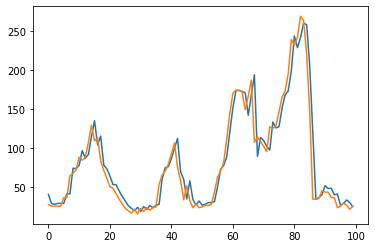

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actual'][:100])

In [ ]:
rmse = np.sqrt(mse(y_val, val_predictions))
print("Validation RMSE ="  ,rmse)

Validation RMSE = 35.0146409299841


In [ ]:
test = pd.read_csv('/content/sample_data/pollution_test_data1.csv')
test.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
0,-16,4,1027,SE,3.58,0,0,128
1,-17,5,1027,SE,7.60,0,0,77
2,-16,4,1027,SE,9.39,0,0,65
3,-16,1,1028,cv,0.89,0,0,79
4,-14,0,1028,NE,1.79,0,0,93


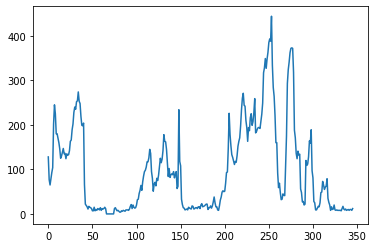

In [ ]:
target2 = test['pollution']
target2.plot()

In [ ]:
def wind_encode(s):
    if s == "SE":
        return 1
    elif s == "NE":
        return 2
    elif s == "NW":
        return 3
    else:
        return 4

test["wind_dir"] = test["wnd_dir"].apply(wind_encode)
test = test.drop(["wnd_dir"], axis=1).head()
test.head()

,dew,temp,press,wnd_spd,snow,rain,pollution,wind_dir
0,-16,4,1027,3.58,0,0,128,1
1,-17,5,1027,7.60,0,0,77,1
2,-16,4,1027,9.39,0,0,65,1
3,-16,1,1028,0.89,0,0,79,4
4,-14,0,1028,1.79,0,0,93,2


In [ ]:
WINDOW_SIZE=5
X_test, y_test = df_to_X_y(target2, WINDOW_SIZE)
X_test.shape, y_test.shape

((341, 5, 1), (341,))

In [ ]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions,
                                  'Actual':y_test})
test_results.head()

11/11 [==============================] - 0s 3ms/step


,Test Predictions,Actual
0,100.419861,104
1,109.077690,202
2,199.753403,245
3,246.788742,225
4,215.207474,180


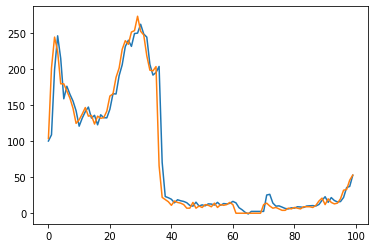

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actual'][:100])

In [ ]:
rmse = np.sqrt(mse(y_test, test_predictions))
print("Validation RMSE ="  ,rmse)

Validation RMSE = 31.48125353042962


In [ ]:
target2.head()

In [ ]:
def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions,
                           'Actual': y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actual'][start:end])
    return df, np.sqrt(mse(y, predictions))

11/11 [==============================] - 0s 3ms/step


(     Predictions  Actual
 0     100.419861     104
 1     109.077690     202
 2     199.753403     245
 3     246.788742     225
 4     215.207474     180
 ..           ...     ...
 336    11.579885       8
 337    10.223339      10
 338    11.501496      10
 339    11.688724       8
 340    10.315167      12
 
 [341 rows x 2 columns], 31.48125353042962)

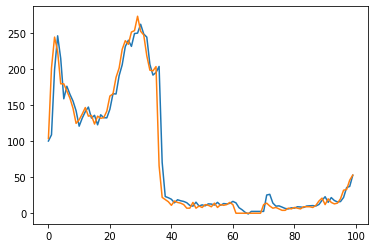

In [ ]:
plot_predictions1(model1, X_test, y_test)